In [1]:
import pandas as pd
import os
import pandas as pd

# Full path to the CSV file
file_path = os.path.join("C:\\Users\\Administrator\\Desktop\\Python\\ML_CI_CD\\CI-CD-for-ML\\Data", "drug.csv")

# Read the CSV file into a DataFrame
drug_df = pd.read_csv(file_path)
drug_df = drug_df.sample(frac=1)
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
60,38,F,LOW,NORMAL,29.875,DrugY
10,47,F,LOW,HIGH,11.767,drugC
132,49,M,LOW,NORMAL,13.598,drugX
99,15,F,HIGH,NORMAL,16.725,DrugY
77,26,F,HIGH,NORMAL,19.161,DrugY


In [2]:
from sklearn.model_selection import train_test_split

X = drug_df.drop("Drug", axis=1).values
y = drug_df.Drug.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=125
)

We will build a processing pipeline using ColumnTransformer, which will convert categorical values into numbers, fill in missing values, and scale the numerical columns.

After that, we'll create a training pipeline that will take the transformed data and train a random forest classifier.

Finally, we'll train the model.

By using pipelines, we can ensure reproducibility, modularity, and clarity in our code.

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

cat_col = [1,2,3]
num_col = [0,4]

transform = ColumnTransformer(
    [
        ("encoder", OrdinalEncoder(), cat_col),
        ("num_imputer", SimpleImputer(strategy="median"), num_col),
        ("num_scaler", StandardScaler(), num_col),
    ]
)
pipe = Pipeline(
    steps=[
        ("preprocessing", transform),
        ("model", RandomForestClassifier(n_estimators=100, random_state=125)),
    ]
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

# Model Evaluation

In [4]:
from sklearn.metrics import accuracy_score, f1_score

predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

print("Accuracy:", str(round(accuracy, 2) * 100) + "%", "F1:", round(f1, 2))

Accuracy: 92.0% F1: 0.85


### Create metrics and save in the result folder

In [5]:
with open("metrics.txt", "w") as outfile:
    outfile.write(f"\n Accuracy = {accuracy.round(2)}, F1 Score = {f1.round(2)}.")


### Create Confusion Matrix and save it inside the results folder 

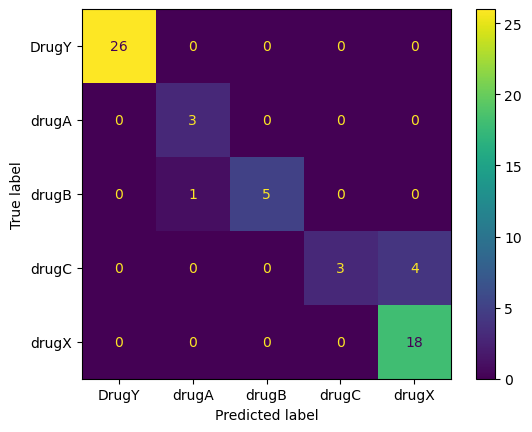

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
plt.savefig("model_results.png", dpi=120)

# Saving the Model

In [7]:
import os
import skops.io as sio

# Define the absolute path for the 'Model' directory
model_directory = r"C:\Users\Administrator\Desktop\Python\ML_CI_CD\CI-CD-for-ML\Model"

# Create the 'Model' directory if it doesn't exist
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Save the scikit-learn pipeline and model
sio.dump(pipe, os.path.join(model_directory, "drug_pipeline.skops"))

# Load the entire pipeline
loaded_pipeline = sio.load(os.path.join(model_directory, "drug_pipeline.skops"), trusted=True)


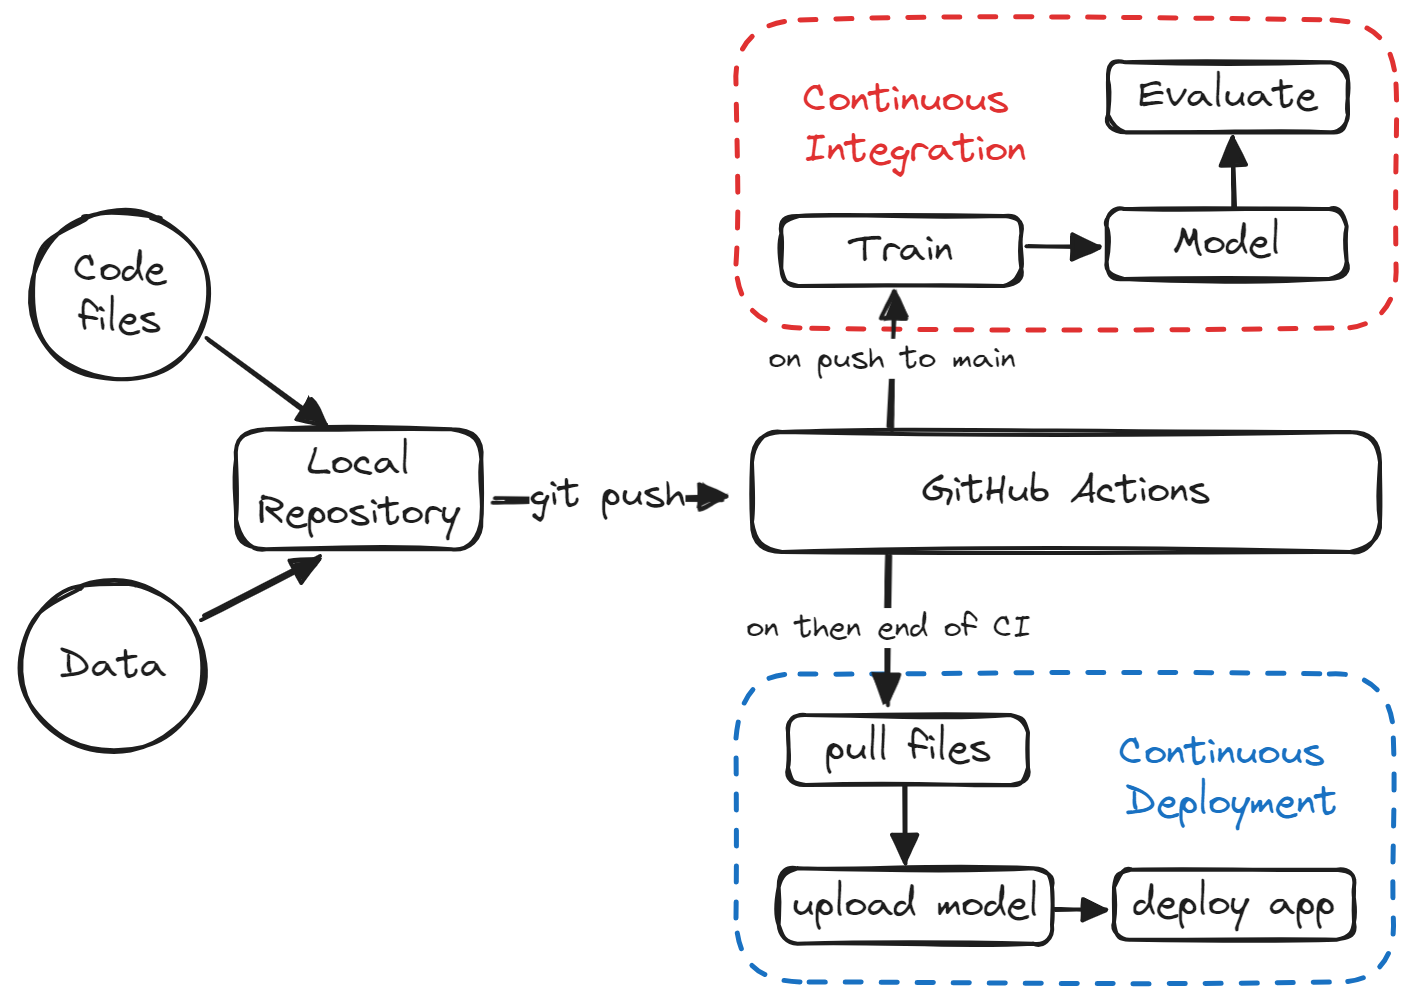

# Steps to Build Continuous Integration Pipeline

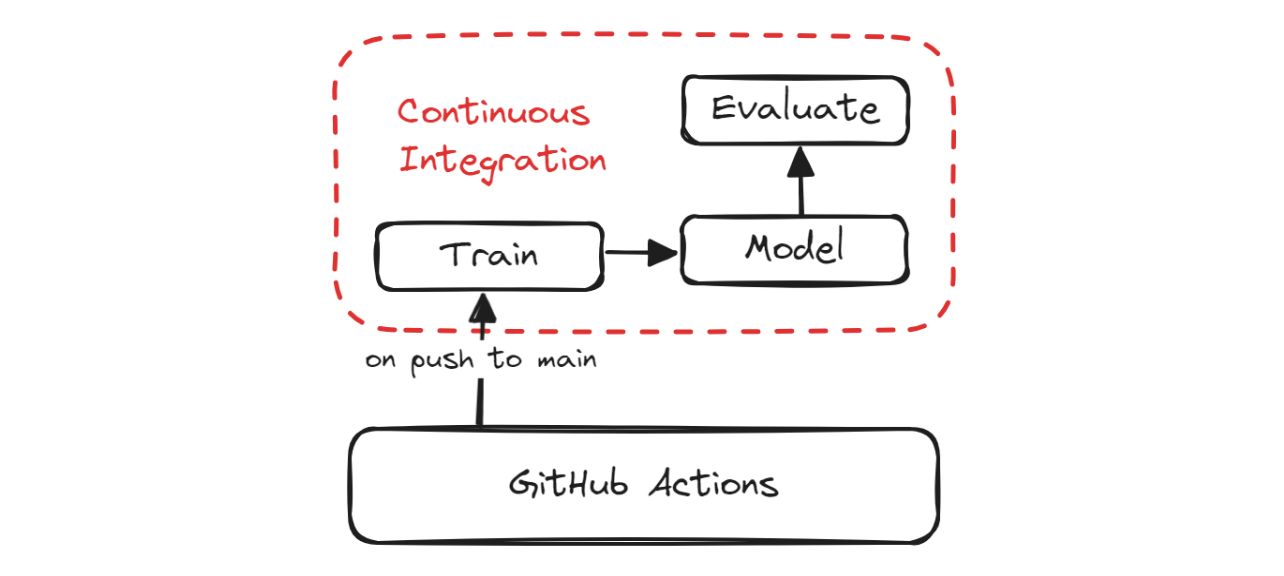